In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import GridSearchCV
import itertools
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import BallTree
from sklearn.neighbors import KDTree
import seaborn as sns

In [33]:
auto = pd.read_csv("auto_policies_2020.csv")
auto_test = pd.read_csv("auto_potential_customers_2022.csv")

In [34]:
auto

,pol_number,pol_eff_dt,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,claim_office,numclaims,claimcst0,annual_premium
0,43124327,12/30/2020,F,4.0,7/12/1968,381.0,D,133.6,2,HBACK,1.331,NaN,0,0.0,716.53
1,21919609,12/30/2020,F,2.0,11/5/1982,549.0,D,163.6,1,UTE,3.740,NaN,0,0.0,716.53
2,72577057,12/30/2020,M,2.0,11/26/1983,649.0,B,117.5,4,COUPE,0.880,NaN,0,0.0,716.53
3,92175225,12/30/2020,M,4.0,11/2/1960,743.0,B,100.7,3,SEDAN,1.045,NaN,0,0.0,716.53
4,66223239,12/30/2020,F,4.0,1/4/1968,817.0,C,115.5,4,HBACK,0.473,NaN,0,0.0,716.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60387,73248694,1/2/2020,F,5.0,5/10/1956,809.0,C,145.5,4,HBACK,0.891,NaN,0,0.0,716.53
60388,71411764,1/2/2020,M,4.0,3/22/1961,681.0,D,86.3,1,HBACK,1.881,NaN,0,0.0,716.53
60389,89353155,1/2/2020,M,4.0,9/29/1965,773.0,F,110.0,1,STNWG,5.170,NaN,0,0.0,716.53
60390,40916605,1/2/2020,M,3.0,8/1/1978,714.0,B,NaN,1,HBACK,1.903,NaN,0,0.0,716.53


In [35]:
auto_test

,quote_number,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value
0,29323463,F,4.0,4/14/1968,750.0,C,124.5,2,HBACK,1.100
1,16732441,M,2.0,10/4/1984,567.0,F,NaN,3,STNWG,2.079
2,68744228,M,4.0,11/30/1962,378.0,D,111.4,3,HDTOP,2.354
3,30875047,F,3.0,5/17/1973,807.0,E,NaN,4,UTE,1.969
4,37049210,M,6.0,10/2/1945,844.0,C,111.0,1,HBACK,1.969
...,...,...,...,...,...,...,...,...,...,...
7459,95907219,F,4.0,1/7/1966,690.0,D,71.4,4,STNWG,1.056
7460,73906733,M,5.0,5/25/1958,558.0,C,142.5,1,STNWG,4.521
7461,45407372,F,4.0,9/2/1966,527.0,A,62.7,1,STNWG,3.102
7462,41423165,M,5.0,8/9/1958,817.0,B,129.0,4,SEDAN,0.803


In [36]:
#dropping completely unimportant columns
auto = auto.drop(columns="claim_office")


In [37]:
auto.isnull().sum()

pol_number           0
pol_eff_dt           0
gender               0
agecat            4831
date_of_birth        0
credit_score      2801
area                 0
traffic_index     3503
veh_age              0
veh_body             0
veh_value            0
numclaims            0
claimcst0            0
annual_premium       0
dtype: int64

In [38]:
auto_test.isnull().sum()

quote_number       0
gender             0
agecat           632
date_of_birth      0
credit_score     355
area               0
traffic_index    449
veh_age            0
veh_body           0
veh_value          0
dtype: int64

In [39]:
auto_updated= auto
auto_updated["numclaims"] = auto_updated["numclaims"].fillna(0) #making sure zero claims are not dropped with na values
auto_updated = auto_updated.dropna() # Dropping rows with missing values
auto_updated = auto_updated.reset_index(drop = True) #resetting the index

In [40]:
auto_test_updated= auto_test
auto_test_updated = auto_test_updated.dropna() # Dropping rows with missing values
auto_test_updated = auto_test_updated.reset_index(drop = True) #resetting the index

In [41]:
auto_updated

,pol_number,pol_eff_dt,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,numclaims,claimcst0,annual_premium
0,43124327,12/30/2020,F,4.0,7/12/1968,381.0,D,133.6,2,HBACK,1.331,0,0.0,716.53
1,21919609,12/30/2020,F,2.0,11/5/1982,549.0,D,163.6,1,UTE,3.740,0,0.0,716.53
2,72577057,12/30/2020,M,2.0,11/26/1983,649.0,B,117.5,4,COUPE,0.880,0,0.0,716.53
3,92175225,12/30/2020,M,4.0,11/2/1960,743.0,B,100.7,3,SEDAN,1.045,0,0.0,716.53
4,66223239,12/30/2020,F,4.0,1/4/1968,817.0,C,115.5,4,HBACK,0.473,0,0.0,716.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49914,56406328,1/2/2020,F,5.0,11/14/1950,739.0,C,141.0,3,HBACK,1.265,0,0.0,716.53
49915,47830088,1/2/2020,F,3.0,8/2/1977,755.0,E,34.5,4,UTE,2.310,0,0.0,716.53
49916,73248694,1/2/2020,F,5.0,5/10/1956,809.0,C,145.5,4,HBACK,0.891,0,0.0,716.53
49917,71411764,1/2/2020,M,4.0,3/22/1961,681.0,D,86.3,1,HBACK,1.881,0,0.0,716.53


In [42]:
auto_test_updated

,quote_number,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value
0,29323463,F,4.0,4/14/1968,750.0,C,124.5,2,HBACK,1.100
1,68744228,M,4.0,11/30/1962,378.0,D,111.4,3,HDTOP,2.354
2,37049210,M,6.0,10/2/1945,844.0,C,111.0,1,HBACK,1.969
3,90859532,M,1.0,1/19/1995,743.0,C,133.5,1,HBACK,2.090
4,58572612,M,5.0,3/27/1953,647.0,F,156.0,3,HDTOP,2.915
...,...,...,...,...,...,...,...,...,...,...
6119,95907219,F,4.0,1/7/1966,690.0,D,71.4,4,STNWG,1.056
6120,73906733,M,5.0,5/25/1958,558.0,C,142.5,1,STNWG,4.521
6121,45407372,F,4.0,9/2/1966,527.0,A,62.7,1,STNWG,3.102
6122,41423165,M,5.0,8/9/1958,817.0,B,129.0,4,SEDAN,0.803


In [43]:
#Finding the correct edge cases for the age cat in order to repopulate the agecat later on
auto2 = auto_updated.sort_values("date_of_birth")
    # making boolean series for a team name
for i in range(0,7):
    filter = auto2["agecat"]== i
    auto3= auto2.where(filter)
    auto3
    auto3 = auto3.dropna()
    auto3
    print(auto3.date_of_birth.min())
    print(auto3.date_of_birth.max())

nan
nan
1/1/1990
9/9/1999
1/1/1980
9/9/1989
1/1/1970
9/9/1979
1/1/1960
9/9/1969
1/1/1950
9/9/1959
1/1/1933
9/9/1947


In [44]:
# Formating the date column to be a readable data in python using .to_datetime() function
auto['date_of_birth']= pd.to_datetime(auto['date_of_birth'],format='%m/%d/%Y')
auto_test['date_of_birth']= pd.to_datetime(auto_test['date_of_birth'],format='%m/%d/%Y')

In [45]:
# Created columns based on column using date time package.
auto['year']= auto['date_of_birth'].dt.year
auto['month']= auto['date_of_birth'].dt.month
auto['day']= auto['date_of_birth'].dt.day

auto_test['year']= auto_test['date_of_birth'].dt.year
auto_test['month']= auto_test['date_of_birth'].dt.month
auto_test['day']= auto_test['date_of_birth'].dt.day

In [46]:
# Binned values for training data
binned_values_train = []

# Creating the bins using an if-else statement
for value in auto['year']:
    if value <= 1999 and value >= 1990:
        temp = "1"
    elif value <= 1989 and value >= 1980:
        temp = "2"
    elif value <= 1979 and value >= 1970:
        temp = "3"
    elif value <= 1969 and value >= 1960:
        temp = "4"
    elif value <= 1959 and value >= 1950:
        temp = "5"
    else:
        temp = "6"
    binned_values_train.append(temp)

### Testing Data ###

# Binned values for testing data
binned_values_test = []

for value in auto_test['year']:
    if value <= 1999 and value >= 1990:
        temp = "1"
    elif value <= 1989 and value >= 1980:
        temp = "2"
    elif value <= 1979 and value >= 1970:
        temp = "3"
    elif value <= 1969 and value >= 1960:
        temp = "4"
    elif value <= 1959 and value >= 1950:
        temp = "5"
    else:
        temp = "6"
    binned_values_test.append(temp)

In [47]:
# Creating the new columns in my training and testing dataset
auto["agecat_new"] = binned_values_train
auto

,pol_number,pol_eff_dt,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,numclaims,claimcst0,annual_premium,year,month,day,agecat_new
0,43124327,12/30/2020,F,4.0,1968-07-12,381.0,D,133.6,2,HBACK,1.331,0,0.0,716.53,1968,7,12,4
1,21919609,12/30/2020,F,2.0,1982-11-05,549.0,D,163.6,1,UTE,3.740,0,0.0,716.53,1982,11,5,2
2,72577057,12/30/2020,M,2.0,1983-11-26,649.0,B,117.5,4,COUPE,0.880,0,0.0,716.53,1983,11,26,2
3,92175225,12/30/2020,M,4.0,1960-11-02,743.0,B,100.7,3,SEDAN,1.045,0,0.0,716.53,1960,11,2,4
4,66223239,12/30/2020,F,4.0,1968-01-04,817.0,C,115.5,4,HBACK,0.473,0,0.0,716.53,1968,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60387,73248694,1/2/2020,F,5.0,1956-05-10,809.0,C,145.5,4,HBACK,0.891,0,0.0,716.53,1956,5,10,5
60388,71411764,1/2/2020,M,4.0,1961-03-22,681.0,D,86.3,1,HBACK,1.881,0,0.0,716.53,1961,3,22,4
60389,89353155,1/2/2020,M,4.0,1965-09-29,773.0,F,110.0,1,STNWG,5.170,0,0.0,716.53,1965,9,29,4
60390,40916605,1/2/2020,M,3.0,1978-08-01,714.0,B,NaN,1,HBACK,1.903,0,0.0,716.53,1978,8,1,3


In [48]:
auto_test["agecat_new"] = binned_values_test
auto_test

,quote_number,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,year,month,day,agecat_new
0,29323463,F,4.0,1968-04-14,750.0,C,124.5,2,HBACK,1.100,1968,4,14,4
1,16732441,M,2.0,1984-10-04,567.0,F,NaN,3,STNWG,2.079,1984,10,4,2
2,68744228,M,4.0,1962-11-30,378.0,D,111.4,3,HDTOP,2.354,1962,11,30,4
3,30875047,F,3.0,1973-05-17,807.0,E,NaN,4,UTE,1.969,1973,5,17,3
4,37049210,M,6.0,1945-10-02,844.0,C,111.0,1,HBACK,1.969,1945,10,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7459,95907219,F,4.0,1966-01-07,690.0,D,71.4,4,STNWG,1.056,1966,1,7,4
7460,73906733,M,5.0,1958-05-25,558.0,C,142.5,1,STNWG,4.521,1958,5,25,5
7461,45407372,F,4.0,1966-09-02,527.0,A,62.7,1,STNWG,3.102,1966,9,2,4
7462,41423165,M,5.0,1958-08-09,817.0,B,129.0,4,SEDAN,0.803,1958,8,9,5


In [49]:
auto.isnull().sum()

pol_number           0
pol_eff_dt           0
gender               0
agecat            4831
date_of_birth        0
credit_score      2801
area                 0
traffic_index     3503
veh_age              0
veh_body             0
veh_value            0
numclaims            0
claimcst0            0
annual_premium       0
year                 0
month                0
day                  0
agecat_new           0
dtype: int64

In [50]:
auto_test.isnull().sum()

quote_number       0
gender             0
agecat           632
date_of_birth      0
credit_score     355
area               0
traffic_index    449
veh_age            0
veh_body           0
veh_value          0
year               0
month              0
day                0
agecat_new         0
dtype: int64

In [51]:
#As a result of binning the agecat, we can replace the old agecat resulting in less values being lost
auto = auto.drop(columns = "agecat")
auto_test = auto_test.drop(columns = "agecat")


In [52]:
auto = auto.drop(columns = ["date_of_birth","pol_eff_dt"])
auto_test = auto_test.drop(columns = ["date_of_birth"])

In [53]:
auto_updated_2= auto
auto_updated_2["numclaims"] = auto_updated_2["numclaims"].fillna(0) #making sure zero claims are not dropped with na values
auto_updated_2 = auto_updated_2.dropna() # Dropping rows with missing values
auto_updated_2 = auto_updated_2.reset_index(drop = True) #resetting the index

In [54]:
auto_test_updated_2= auto_test
auto_test_updated_2 = auto_test_updated_2.dropna() # Dropping rows with missing values
auto_test_updated_2 = auto_test_updated_2.reset_index(drop = True) #resetting the index

In [55]:
#Here is the proof
auto_updated_2

,pol_number,gender,credit_score,area,traffic_index,veh_age,veh_body,veh_value,numclaims,claimcst0,annual_premium,year,month,day,agecat_new
0,43124327,F,381.0,D,133.6,2,HBACK,1.331,0,0.0,716.53,1968,7,12,4
1,21919609,F,549.0,D,163.6,1,UTE,3.740,0,0.0,716.53,1982,11,5,2
2,72577057,M,649.0,B,117.5,4,COUPE,0.880,0,0.0,716.53,1983,11,26,2
3,92175225,M,743.0,B,100.7,3,SEDAN,1.045,0,0.0,716.53,1960,11,2,4
4,66223239,F,817.0,C,115.5,4,HBACK,0.473,0,0.0,716.53,1968,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54247,56406328,F,739.0,C,141.0,3,HBACK,1.265,0,0.0,716.53,1950,11,14,5
54248,47830088,F,755.0,E,34.5,4,UTE,2.310,0,0.0,716.53,1977,8,2,3
54249,73248694,F,809.0,C,145.5,4,HBACK,0.891,0,0.0,716.53,1956,5,10,5
54250,71411764,M,681.0,D,86.3,1,HBACK,1.881,0,0.0,716.53,1961,3,22,4


In [56]:
auto_test_updated_2


,quote_number,gender,credit_score,area,traffic_index,veh_age,veh_body,veh_value,year,month,day,agecat_new
0,29323463,F,750.0,C,124.5,2,HBACK,1.100,1968,4,14,4
1,68744228,M,378.0,D,111.4,3,HDTOP,2.354,1962,11,30,4
2,37049210,M,844.0,C,111.0,1,HBACK,1.969,1945,10,2,6
3,90859532,M,743.0,C,133.5,1,HBACK,2.090,1995,1,19,1
4,58572612,M,647.0,F,156.0,3,HDTOP,2.915,1953,3,27,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6679,95907219,F,690.0,D,71.4,4,STNWG,1.056,1966,1,7,4
6680,73906733,M,558.0,C,142.5,1,STNWG,4.521,1958,5,25,5
6681,45407372,F,527.0,A,62.7,1,STNWG,3.102,1966,9,2,4
6682,41423165,M,817.0,B,129.0,4,SEDAN,0.803,1958,8,9,5


In [57]:
#54252>49919 and 6684>6124 meaning less rows were lost

In [58]:
auto = auto_updated_2
auto_test = auto_test_updated_2

In [59]:
auto_test.dtypes

quote_number       int64
gender            object
credit_score     float64
area              object
traffic_index    float64
veh_age            int64
veh_body          object
veh_value        float64
year               int64
month              int64
day                int64
agecat_new        object
dtype: object

In [60]:
auto.dtypes

pol_number          int64
gender             object
credit_score      float64
area               object
traffic_index     float64
veh_age             int64
veh_body           object
veh_value         float64
numclaims           int64
claimcst0         float64
annual_premium    float64
year                int64
month               int64
day                 int64
agecat_new         object
dtype: object

In [31]:
#auto_test["gender"]=auto_test["gender"].astype("category")
#auto_test["area"]=auto_test["area"].astype("category")
#auto_test["agecat_new"]=auto_test["agecat_new"].astype("category")

In [32]:
#auto["gender"]=auto["gender"].astype("category")
#auto["area"]=auto["area"].astype("category")
#auto["agecat_new"]=auto["agecat_new"].astype("category")

In [61]:
# creating instance of one-hot-encoder for gender in the training  and test dataset
encoder = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(encoder.fit_transform(auto[["gender"]]).toarray())
enc_df.columns = encoder.get_feature_names(["gender"])

# merge with main df bridge_df on key values
auto = pd.concat([auto.reset_index(drop=True), enc_df.reset_index(drop=True)], axis = 1)
auto

# creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(encoder.fit_transform(auto_test[["gender"]]).toarray())
enc_df.columns = encoder.get_feature_names(["gender"])

# merge with main df on the row index - essentially pressing the datasets together 
auto_test = pd.concat([auto_test.reset_index(drop=True), enc_df.reset_index(drop=True)], axis = 1)
auto_test

C:\Users\Benji Bad Cox\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Benji Bad Cox\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,quote_number,gender,credit_score,area,traffic_index,veh_age,veh_body,veh_value,year,month,day,agecat_new,gender_F,gender_M
0,29323463,F,750.0,C,124.5,2,HBACK,1.100,1968,4,14,4,1.0,0.0
1,68744228,M,378.0,D,111.4,3,HDTOP,2.354,1962,11,30,4,0.0,1.0
2,37049210,M,844.0,C,111.0,1,HBACK,1.969,1945,10,2,6,0.0,1.0
3,90859532,M,743.0,C,133.5,1,HBACK,2.090,1995,1,19,1,0.0,1.0
4,58572612,M,647.0,F,156.0,3,HDTOP,2.915,1953,3,27,5,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6679,95907219,F,690.0,D,71.4,4,STNWG,1.056,1966,1,7,4,1.0,0.0
6680,73906733,M,558.0,C,142.5,1,STNWG,4.521,1958,5,25,5,0.0,1.0
6681,45407372,F,527.0,A,62.7,1,STNWG,3.102,1966,9,2,4,1.0,0.0
6682,41423165,M,817.0,B,129.0,4,SEDAN,0.803,1958,8,9,5,0.0,1.0


In [62]:
# creating instance of one-hot-encoder in area for the training and test dataset
encoder = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(encoder.fit_transform(auto[["area"]]).toarray())
enc_df.columns = encoder.get_feature_names(["area"])

# merge with main df bridge_df on key values
auto = pd.concat([auto.reset_index(drop=True), enc_df.reset_index(drop=True)], axis = 1)
auto

# creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(encoder.fit_transform(auto_test[["area"]]).toarray())
enc_df.columns = encoder.get_feature_names(["area"])

# merge with main df on the row index - essentially pressing the datasets together 
auto_test = pd.concat([auto_test.reset_index(drop=True), enc_df.reset_index(drop=True)], axis = 1)
auto_test

C:\Users\Benji Bad Cox\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Benji Bad Cox\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,quote_number,gender,credit_score,area,traffic_index,veh_age,veh_body,veh_value,year,month,day,agecat_new,gender_F,gender_M,area_A,area_B,area_C,area_D,area_E,area_F
0,29323463,F,750.0,C,124.5,2,HBACK,1.100,1968,4,14,4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,68744228,M,378.0,D,111.4,3,HDTOP,2.354,1962,11,30,4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,37049210,M,844.0,C,111.0,1,HBACK,1.969,1945,10,2,6,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,90859532,M,743.0,C,133.5,1,HBACK,2.090,1995,1,19,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,58572612,M,647.0,F,156.0,3,HDTOP,2.915,1953,3,27,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6679,95907219,F,690.0,D,71.4,4,STNWG,1.056,1966,1,7,4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6680,73906733,M,558.0,C,142.5,1,STNWG,4.521,1958,5,25,5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6681,45407372,F,527.0,A,62.7,1,STNWG,3.102,1966,9,2,4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6682,41423165,M,817.0,B,129.0,4,SEDAN,0.803,1958,8,9,5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [63]:
# creating instance of one-hot-encoder for vehicle body in the training and test dataset
encoder = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(encoder.fit_transform(auto[["veh_body"]]).toarray())
enc_df.columns = encoder.get_feature_names(["veh_body"])

# merge with main df bridge_df on key values
auto = pd.concat([auto.reset_index(drop=True), enc_df.reset_index(drop=True)], axis = 1)
auto

# creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(encoder.fit_transform(auto_test[["veh_body"]]).toarray())
enc_df.columns = encoder.get_feature_names(["veh_body"])

# merge with main df on the row index - essentially pressing the datasets together 
auto_test = pd.concat([auto_test.reset_index(drop=True), enc_df.reset_index(drop=True)], axis = 1)
auto_test

C:\Users\Benji Bad Cox\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Benji Bad Cox\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,quote_number,gender,credit_score,area,traffic_index,veh_age,veh_body,veh_value,year,month,...,veh_body_HBACK,veh_body_HDTOP,veh_body_MCARA,veh_body_MIBUS,veh_body_PANVN,veh_body_RDSTR,veh_body_SEDAN,veh_body_STNWG,veh_body_TRUCK,veh_body_UTE
0,29323463,F,750.0,C,124.5,2,HBACK,1.100,1968,4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,68744228,M,378.0,D,111.4,3,HDTOP,2.354,1962,11,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,37049210,M,844.0,C,111.0,1,HBACK,1.969,1945,10,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,90859532,M,743.0,C,133.5,1,HBACK,2.090,1995,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,58572612,M,647.0,F,156.0,3,HDTOP,2.915,1953,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6679,95907219,F,690.0,D,71.4,4,STNWG,1.056,1966,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6680,73906733,M,558.0,C,142.5,1,STNWG,4.521,1958,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6681,45407372,F,527.0,A,62.7,1,STNWG,3.102,1966,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6682,41423165,M,817.0,B,129.0,4,SEDAN,0.803,1958,8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [64]:
auto= auto.drop(columns="gender")
auto_test= auto_test.drop(columns="gender")

In [65]:
auto= auto.drop(columns="area")
auto_test= auto_test.drop(columns="area")

In [66]:
auto= auto.drop(columns="veh_body")
auto_test= auto_test.drop(columns="veh_body")

In [67]:
auto

,pol_number,credit_score,traffic_index,veh_age,veh_value,numclaims,claimcst0,annual_premium,year,month,...,veh_body_HBACK,veh_body_HDTOP,veh_body_MCARA,veh_body_MIBUS,veh_body_PANVN,veh_body_RDSTR,veh_body_SEDAN,veh_body_STNWG,veh_body_TRUCK,veh_body_UTE
0,43124327,381.0,133.6,2,1.331,0,0.0,716.53,1968,7,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,21919609,549.0,163.6,1,3.740,0,0.0,716.53,1982,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,72577057,649.0,117.5,4,0.880,0,0.0,716.53,1983,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,92175225,743.0,100.7,3,1.045,0,0.0,716.53,1960,11,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,66223239,817.0,115.5,4,0.473,0,0.0,716.53,1968,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54247,56406328,739.0,141.0,3,1.265,0,0.0,716.53,1950,11,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54248,47830088,755.0,34.5,4,2.310,0,0.0,716.53,1977,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
54249,73248694,809.0,145.5,4,0.891,0,0.0,716.53,1956,5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54250,71411764,681.0,86.3,1,1.881,0,0.0,716.53,1961,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
auto_test

,quote_number,credit_score,traffic_index,veh_age,veh_value,year,month,day,agecat_new,gender_F,...,veh_body_HBACK,veh_body_HDTOP,veh_body_MCARA,veh_body_MIBUS,veh_body_PANVN,veh_body_RDSTR,veh_body_SEDAN,veh_body_STNWG,veh_body_TRUCK,veh_body_UTE
0,29323463,750.0,124.5,2,1.100,1968,4,14,4,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,68744228,378.0,111.4,3,2.354,1962,11,30,4,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,37049210,844.0,111.0,1,1.969,1945,10,2,6,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,90859532,743.0,133.5,1,2.090,1995,1,19,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,58572612,647.0,156.0,3,2.915,1953,3,27,5,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6679,95907219,690.0,71.4,4,1.056,1966,1,7,4,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6680,73906733,558.0,142.5,1,4.521,1958,5,25,5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6681,45407372,527.0,62.7,1,3.102,1966,9,2,4,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6682,41423165,817.0,129.0,4,0.803,1958,8,9,5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [69]:
auto.dtypes

pol_number          int64
credit_score      float64
traffic_index     float64
veh_age             int64
veh_value         float64
numclaims           int64
claimcst0         float64
annual_premium    float64
year                int64
month               int64
day                 int64
agecat_new         object
gender_F          float64
gender_M          float64
area_A            float64
area_B            float64
area_C            float64
area_D            float64
area_E            float64
area_F            float64
veh_body_BUS      float64
veh_body_CONVT    float64
veh_body_COUPE    float64
veh_body_HBACK    float64
veh_body_HDTOP    float64
veh_body_MCARA    float64
veh_body_MIBUS    float64
veh_body_PANVN    float64
veh_body_RDSTR    float64
veh_body_SEDAN    float64
veh_body_STNWG    float64
veh_body_TRUCK    float64
veh_body_UTE      float64
dtype: object

In [70]:
auto_test.dtypes

quote_number        int64
credit_score      float64
traffic_index     float64
veh_age             int64
veh_value         float64
year                int64
month               int64
day                 int64
agecat_new         object
gender_F          float64
gender_M          float64
area_A            float64
area_B            float64
area_C            float64
area_D            float64
area_E            float64
area_F            float64
veh_body_BUS      float64
veh_body_CONVT    float64
veh_body_COUPE    float64
veh_body_HBACK    float64
veh_body_HDTOP    float64
veh_body_MCARA    float64
veh_body_MIBUS    float64
veh_body_PANVN    float64
veh_body_RDSTR    float64
veh_body_SEDAN    float64
veh_body_STNWG    float64
veh_body_TRUCK    float64
veh_body_UTE      float64
dtype: object

In [71]:
#first divide into feature and response variables
X = auto.drop('numclaims', axis = 1)
y = auto.numclaims



#create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=4)

In [72]:
auto_sample = auto.sample(frac=.1)
x = auto_sample.drop('numclaims', axis =1)
y_2 = auto_sample.numclaims

#create training and test sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(x, y_2, test_size=.25, random_state=4)

In [73]:
scaler = MinMaxScaler()
X_train_prepped_2 = scaler.fit_transform(X_train_2)
X_test_prepped_2 = scaler.fit_transform(X_test_2)

In [74]:
#scale both the training and test sets before creating a model
scaler = MinMaxScaler()
X_train_prepped = scaler.fit_transform(X_train)
X_test_prepped = scaler.fit_transform(X_test)

In [75]:
X_train_prepped
#X_test_prepped

array([[0.52180008, 0.33333333, 0.31642512, ..., 0.        , 0.        ,
        0.        ],
       [0.09227186, 0.85245902, 0.70338164, ..., 0.        , 0.        ,
        0.        ],
       [0.84169745, 0.571949  , 0.42415459, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.81398453, 0.17304189, 0.59275362, ..., 0.        , 0.        ,
        0.        ],
       [0.65778458, 0.33515483, 0.61594203, ..., 1.        , 0.        ,
        0.        ],
       [0.84112496, 0.63934426, 0.23913043, ..., 0.        , 0.        ,
        0.        ]])

In [76]:
# Initialize decision tree classifier non-scaled
dt_clf = DecisionTreeClassifier()

# Fit and score
dt_clf.fit(X_train,y_train)

# predictions
y_pred = dt_clf.predict(X_test)

# Computing accuracy score
f1_score(y_test, y_pred, average = "micro")

0.9505271695052717

In [77]:
# Initialize decision tree classifier scaled
dt_clf = DecisionTreeClassifier()

# Fit and score
dt_clf.fit(X_train_prepped,y_train)

# predictions
y_pred = dt_clf.predict(X_test_prepped)

# Computing accuracy score
f1_score(y_test, y_pred, average = "micro")

0.9494212194942122

In [79]:
# For the independent test set, I am going to try both scaled and unscaled to see if there is a difference
# First I will not scale the data
#I am also using the sample to reduce processing power required

# Create results list
knn_results_its = []

for k in range(1,100):
    # Initialize a model with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit on the training dataset to learn
    knn.fit(X_train_2, y_train_2)

    # Knn classifier predictions
    predictions = knn.predict(X_test_2)
    
    # Accuracy score
    acc_its = f1_score(y_test_2, predictions, average = "micro")
    
    # Append accuracy
    knn_results_its.append(acc_its)

In [80]:
# Create data frame of knn results
df_knn_results_its = pd.DataFrame({"k": range(1,100),
                          "accuracy": knn_results_its})
df_knn_results_its

,k,accuracy
0,1,0.729550
1,2,0.810612
2,3,0.785556
3,4,0.821665
4,5,0.819455
...,...,...
94,95,0.833456
95,96,0.833456
96,97,0.833456
97,98,0.833456


In [81]:
df_knn_results_its.sort_values(by='accuracy', ascending=False) 

,k,accuracy
49,50,0.833456
74,75,0.833456
72,73,0.833456
71,72,0.833456
70,71,0.833456
...,...,...
3,4,0.821665
4,5,0.819455
1,2,0.810612
2,3,0.785556


In [82]:
#Compare this to the original dataset
# Initialize a model with k neighbors
knn = KNeighborsClassifier(n_neighbors=50)

# Fit on the training dataset to learn
knn.fit(X_train, y_train)

# Knn classifier predictions
predictions = knn.predict(X_test)

# Accuracy score
acc_its = f1_score(y_test, predictions, average = "micro")
acc_its

0.8374990783749908

In [83]:
#The results are comparable- less than 1 percent difference

In [84]:
# For the independent test set, I am going to try both scaled and unscaled to see if there is a difference


# Create results list
knn_results_its = []

for k in range(1,100):
    # Initialize a model with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit on the training dataset to learn
    knn.fit(X_train_prepped_2, y_train_2)

    # Knn classifier predictions
    predictions = knn.predict(X_test_prepped_2)
    
    # Accuracy score
    acc_its = f1_score(y_test_2, predictions, average = "micro")
    
    # Append accuracy
    knn_results_its.append(acc_its)

In [85]:
# Create data frame of knn results
df_knn_results_its = pd.DataFrame({"k": range(1,100),
                          "accuracy": knn_results_its})
df_knn_results_its

,k,accuracy
0,1,0.766396
1,2,0.830508
2,3,0.811349
3,4,0.825350
4,5,0.820929
...,...,...
94,95,0.833456
95,96,0.833456
96,97,0.833456
97,98,0.833456


In [86]:
df_knn_results_its.sort_values(by='accuracy', ascending=False) 

,k,accuracy
43,44,0.834930
33,34,0.834930
42,43,0.834930
44,45,0.834930
45,46,0.834193
...,...,...
6,7,0.828298
3,4,0.825350
4,5,0.820929
2,3,0.811349


In [87]:
knn = KNeighborsClassifier(n_neighbors=10)

# Fit on the training dataset to learn
knn.fit(X_train_prepped, y_train)

# Knn classifier predictions
predictions = knn.predict(X_test_prepped)

# Accuracy score
acc_its = f1_score(y_test, predictions, average = "micro")
acc_its

0.8437661284376613

In [88]:
#Once again, less than a 1 percent difference

In [89]:
#Unscaled data with decision tree regressor has the best f1 score, so I am going to use that model
#and see if I can improve accuracy using oversampling/undersampling/SMOTE

In [90]:
#Undersampling

In [91]:
X = auto

#create training and test sets for X only
X_train, X_test = train_test_split(X, test_size=.25, random_state=4)

In [92]:
X_train['numclaims'].value_counts()

0    34074
1     5317
2      863
3      298
4      103
5       34
Name: numclaims, dtype: int64

In [93]:
# Undersample Class 5 randomly by selecting 40% of the rows randomly
claims_0 = X_train[X_train['numclaims'] == 0]
claims_0_under = claims_0.sample(round(0.4*len(claims_0)))
claims_0_under.shape

(13630, 33)

In [94]:
# Undersample Class 5 randomly by selecting 4% of the rows randomly
claims_1 = X_train[X_train['numclaims'] == 1]
claims_1_under = claims_1.sample(round(0.4*len(claims_1)))
claims_1_under.shape

(2127, 33)

In [95]:
# Remove the rows that correspond to claims = 0,1
X_train = X_train[X_train.numclaims != 0]
X_train = X_train[X_train.numclaims != 1]


In [96]:
# Add the undersample classes to the X_train to create a new dataset called X_train_balanced.
X_train_balanced = X_train.append([claims_0_under,claims_1_under])
X_train_balanced['numclaims'].value_counts()

C:\Users\Benji Bad Cox\AppData\Local\Temp\ipykernel_19060\1003477545.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train_balanced = X_train.append([claims_0_under,claims_1_under])


0    13630
1     2127
2      863
3      298
4      103
5       34
Name: numclaims, dtype: int64

In [97]:
#divide training data into features and response variables
y_train = X_train_balanced.numclaims
X_train_balanced = X_train_balanced.drop('numclaims', axis = 1)

In [98]:
y_train
#X_train_balanced

32638    2
8784     2
39519    2
35370    2
40788    2
        ..
16598    1
9550     1
24858    1
47081    1
7179     1
Name: numclaims, Length: 17055, dtype: int64

In [99]:
y_test = X_test.numclaims
X_test = X_test.drop('numclaims', axis = 1)

In [100]:
# Initialize decision tree classifier
dt_clf = DecisionTreeClassifier()

# Fit and score
dt_clf.fit(X_train_balanced,y_train)

# predictions
y_pred = dt_clf.predict(X_test)

# Computing accuracy score
f1_score(y_test, y_pred, average = "micro")

0.9347489493474895

In [101]:
#scale both the training and test sets before creating a model
scaler = MinMaxScaler()
X_train_balanced_prepped = scaler.fit_transform(X_train_balanced)
X_test_prepped = scaler.fit_transform(X_test)

In [102]:
# Initialize decision tree classifier
dt_clf = DecisionTreeClassifier()

# Fit and score
dt_clf.fit(X_train_balanced_prepped,y_train)

# predictions
y_pred = dt_clf.predict(X_test_prepped)

# Computing accuracy score
f1_score(y_test, y_pred, average = "micro")

0.9272284892722849

In [103]:
#The highest accuracy score I could get with undersampling was 93.7%, which was lower than the original dataset

In [104]:
#oversampling

In [105]:
X = auto

#create training and test sets for X only
X_train, X_test = train_test_split(X, test_size=.25, random_state=4)

In [106]:
X_train['numclaims'].value_counts()

0    34074
1     5317
2      863
3      298
4      103
5       34
Name: numclaims, dtype: int64

In [107]:
# oversample claims 2 randomly by selecting 200% of the rows randomly. Therefore some rows will be duplicated
claims_2 = X_train[X_train['numclaims'] == 2]
claims_2_over = claims_2.sample(round(4.0*len(claims_2)), replace = True)


# oversample claims 3 randomly by selecting 300% of the rows randomly. Therefore some rows will be duplicated
claims_3 = X_train[X_train['numclaims'] == 3]
claims_3_over = claims_3.sample(round(5.0*len(claims_3)), replace = True)

# oversample claims 4 randomly by selecting 500% of the rows randomly. Therefore some rows will be duplicated
claims_4 = X_train[X_train['numclaims'] == 4]
claims_4_over = claims_4.sample(round(10.0*len(claims_4)), replace = True)

# oversample claims 5 randomly by selecting 800% of the rows randomly. Therefore some rows will be duplicated
claims_5 = X_train[X_train['numclaims'] == 5]
claims_5_over = claims_5.sample(round(20.0*len(claims_5)), replace = True)

In [108]:
X_train_balanced = X_train.append([claims_2_over, claims_3_over, claims_4_over,claims_5_over])
X_train_balanced['numclaims'].value_counts()

C:\Users\Benji Bad Cox\AppData\Local\Temp\ipykernel_19060\1980513327.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train_balanced = X_train.append([claims_2_over, claims_3_over, claims_4_over,claims_5_over])


0    34074
1     5317
2     4315
3     1788
4     1133
5      714
Name: numclaims, dtype: int64

In [109]:
y_train = X_train_balanced.numclaims
X_train_balanced = X_train_balanced.drop('numclaims', axis = 1)

In [110]:
y_train
#X_train_balanced

10199    0
5644     0
23578    0
27476    0
42162    0
        ..
12118    5
7245     5
41509    5
6106     5
17469    5
Name: numclaims, Length: 47341, dtype: int64

In [111]:
y_test = X_test.numclaims
X_test = X_test.drop('numclaims', axis = 1)

In [112]:
# Initialize decision tree classifier
dt_clf = DecisionTreeClassifier()

# Fit and score
dt_clf.fit(X_train_balanced,y_train)

# predictions
y_pred = dt_clf.predict(X_test)

# Computing accuracy score
f1_score(y_test, y_pred, average = "micro")

0.9478728894787289

In [113]:
#scale both the training and test sets before creating a model
scaler = MinMaxScaler()
X_train_balanced_prepped = scaler.fit_transform(X_train_balanced)
X_test_prepped = scaler.fit_transform(X_test)

In [114]:
# Initialize decision tree classifier
dt_clf = DecisionTreeClassifier()

# Fit and score
dt_clf.fit(X_train_balanced_prepped,y_train)

# predictions
y_pred = dt_clf.predict(X_test_prepped)

# Computing accuracy score
f1_score(y_test, y_pred, average = "micro")

0.9513381995133819

In [86]:
#After trying various numbers, the best f1 score I got was 95.2% which is about the same as the original dataset.


In [96]:
#For the classification task, I am going to use decision tree with oversampling because it gives a good accuracy and it adresses the overestimation request in the problem.

In [97]:
#moving onto the claims cost portion of the task

In [115]:
X = auto_sample.drop('claimcst0', axis = 1)
y = auto_sample.claimcst0

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=4)

In [117]:
#scale both the training and test sets before creating a model
scaler = MinMaxScaler()
X_train_prepped = scaler.fit_transform(X_train)
X_test_prepped = scaler.fit_transform(X_test)

In [118]:
#Moving on to find the best method

# Define parameters to search through. Can find all hyperparameters through official sklearn documentation
weights = ["uniform", "distance"]
algorithm = ["auto","ball_tree","kd_tree", "brute"]
n_neighbors = range(1, 10)
p = range(1,5)

# storing our numeric results
results = []

# forloop to get every possible combination of criterion, splitter, and min_sample_leafs
for weight, alg, n_neigh, p in itertools.product(weights, algorithm, n_neighbors, p):

    # Initialize a decision tree regression model with specific parameters
    knn_reg = KNeighborsRegressor(weights = weight,
                               algorithm = alg,
                               n_neighbors = n_neigh,
                                 p = p)
    # Train the decision tree regressor
    knn_reg = knn_reg.fit(X_train_prepped,y_train)
    # Get prediction from decision tree regressor
    y_pred = knn_reg.predict(X_test_prepped)
    # Calculate the mean absolute error metric
    mae = mean_absolute_error(y_test, y_pred)
    # Append to results to store mae
    results.append(mae)


KeyboardInterrupt: 

In [ ]:
# Create dataframe to view results easily
df_results_knn_reg = pd.DataFrame(itertools.product(weights, algorithm, n_neighbors,range(1,5)),
                              columns = ['weights', 'algorithm', 'k', "p"])

# Create a mse column
df_results_knn_reg['mae'] = results
# Uncomment line below to remove scientific notation in data frame
df_results_knn_reg['mae'] = df_results_knn_reg['mae'].astype('int64')
df_results_knn_reg
# Sort values
df_results_knn_reg.sort_values('mae')

In [ ]:
X = auto.drop('claimcst0', axis = 1)
y = auto.claimcst0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=4)


In [ ]:
#scale both the training and test sets before creating a model
scaler = MinMaxScaler()
X_train_prepped = scaler.fit_transform(X_train)
X_test_prepped = scaler.fit_transform(X_test)

In [ ]:
#Testing this to the full dataset
knn_reg = KNeighborsRegressor(weights = "uniform",
                               algorithm = "ball_tree",
                               n_neighbors = 4,
                                 p = 1)
# Train the decision tree regressor
knn_reg = knn_reg.fit(X_train_prepped,y_train)
# Get prediction from decision tree regressor
y_pred = knn_reg.predict(X_test_prepped)
# Calculate the mean absolute error metric
mae = mean_absolute_error(y_test, y_pred)

In [ ]:
mae

In [ ]:
#The full dataset produced a similar result to that of the sample data

In [ ]:
#This is to test the efficacy of the decision tree regressor on its own
# Initialize decision tree classifier
dt_clf = DecisionTreeRegressor()

# Fit and score
dt_clf.fit(X_train, y_train)

# predictions
y_pred = dt_clf.predict(X_test)

# Computing accuracy score
mean_absolute_error(y_test, y_pred)

In [ ]:

# Define parameters to search through. Can find all hyperparameters through official sklearn documentation
criterion = ["friedman_mse", "poisson"]
splitter = ["best", "random"]
min_samples_leaf = range(1, 15)

# storing our numeric results
results = []

# forloop to get every possible combination of criterion, splitter, and min_sample_leafs
for crit, split, min_samp_leaf in itertools.product(criterion, splitter, min_samples_leaf):

    # Initialize a decision tree regression model with specific parameters
    dtr = DecisionTreeRegressor(criterion = crit,
                               splitter = split,
                               min_samples_leaf = min_samp_leaf)
    # Train the decision tree regressor
    dtr = dtr.fit(X_train,y_train)
    # Get prediction from decision tree regressor
    y_pred = dtr.predict(X_test)
    # Calculate the mean absolute error metric
    mae = mean_absolute_error(y_test, y_pred)
    # Append to results to store mse
    results.append(mae)
    

In [ ]:
# Create dataframe to view results easily
df_results_dtr = pd.DataFrame(itertools.product(criterion, splitter, min_samples_leaf),
                              columns = ['criterion', 'splitter', 'min_samples_leaf'])

# Create a mse column
df_results_dtr['mae'] = results
# Uncomment line below to remove scientific notation in data frame
df_results_dtr['mae'] = df_results_dtr['mae'].astype('int64')
df_results_dtr
# Sort values
df_results_dtr.sort_values('mae')

In [ ]:
#Since this is a test on the full dataset as compared to the best that knn has to offer,
#it is safe to say that friedman_mse method with the best splitter and 5 min sample leafs is the best regression tool given the current data.

In [ ]:
#Applying the models to the test dataset

In [ ]:
X = auto

In [ ]:
X['numclaims'].value_counts()

In [ ]:
# oversample claims 2 randomly by selecting 200% of the rows randomly. Therefore some rows will be duplicated
claims_2 = X[X['numclaims'] == 2]
claims_2_over = claims_2.sample(round(4.0*len(claims_2)), replace = True)


# oversample claims 3 randomly by selecting 300% of the rows randomly. Therefore some rows will be duplicated
claims_3 = X[X['numclaims'] == 3]
claims_3_over = claims_3.sample(round(5.0*len(claims_3)), replace = True)

# oversample claims 4 randomly by selecting 500% of the rows randomly. Therefore some rows will be duplicated
claims_4 = X[X['numclaims'] == 4]
claims_4_over = claims_4.sample(round(10.0*len(claims_4)), replace = True)

# oversample claims 5 randomly by selecting 800% of the rows randomly. Therefore some rows will be duplicated
claims_5 = X[X['numclaims'] == 5]
claims_5_over = claims_5.sample(round(20.0*len(claims_5)), replace = True)

In [ ]:
X_balanced = X.append([claims_2_over, claims_3_over, claims_4_over,claims_5_over])
X_balanced['numclaims'].value_counts()

In [105]:
auto_test= auto_test.drop("quote_number", axis = 1)

In [ ]:
auto = auto.dropna()
auto_test = auto_test.dropna()

In [ ]:
X = auto.drop("claimcst0", axis = 1)

In [ ]:
auto_test

In [ ]:
auto

In [ ]:
auto.dtypes

In [ ]:
auto_test.dtypes

In [ ]:
auto["numclaims"]=auto["numclaims"].astype("category")


In [106]:
X= auto.drop(["numclaims","claimcst0","annual_premium","pol_number"], axis=1)
y= auto.numclaims
z= auto_test

In [107]:
# Using the oversampled 
dt_clf = DecisionTreeClassifier()

# Fit and score
fit = dt_clf.fit(X,y)
pred1 = dt_clf.predict(z)

In [108]:
auto_test["numclaims"]= pred1

In [109]:
auto_test

,credit_score,traffic_index,veh_age,veh_value,year,month,day,agecat_new,gender_F,gender_M,...,veh_body_HDTOP,veh_body_MCARA,veh_body_MIBUS,veh_body_PANVN,veh_body_RDSTR,veh_body_SEDAN,veh_body_STNWG,veh_body_TRUCK,veh_body_UTE,numclaims
0,750.0,124.5,2,1.100,1968,4,14,4,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,378.0,111.4,3,2.354,1962,11,30,4,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,844.0,111.0,1,1.969,1945,10,2,6,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,743.0,133.5,1,2.090,1995,1,19,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,647.0,156.0,3,2.915,1953,3,27,5,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6679,690.0,71.4,4,1.056,1966,1,7,4,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
6680,558.0,142.5,1,4.521,1958,5,25,5,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
6681,527.0,62.7,1,3.102,1966,9,2,4,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
6682,817.0,129.0,4,0.803,1958,8,9,5,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2


In [110]:
X = auto.drop(["claimcst0","annual_premium","pol_number"], axis = 1)
y = auto.claimcst0

In [111]:
# Using the oversampled 
dt_clf = DecisionTreeRegressor()

# Fit and score
fit = dt_clf.fit(X,y)
pred = dt_clf.predict(z)

C:\AnacondaSqueeze\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [112]:
auto_test["claimcst0"]=pred

In [113]:
auto_test

,credit_score,traffic_index,veh_age,veh_value,year,month,day,agecat_new,gender_F,gender_M,...,veh_body_MCARA,veh_body_MIBUS,veh_body_PANVN,veh_body_RDSTR,veh_body_SEDAN,veh_body_STNWG,veh_body_TRUCK,veh_body_UTE,numclaims,claimcst0
0,750.0,124.5,2,1.100,1968,4,14,4,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1348.914970
1,378.0,111.4,3,2.354,1962,11,30,4,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,62843.748350
2,844.0,111.0,1,1.969,1945,10,2,6,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,44009.417850
3,743.0,133.5,1,2.090,1995,1,19,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,44009.417850
4,647.0,156.0,3,2.915,1953,3,27,5,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,870.912052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6679,690.0,71.4,4,1.056,1966,1,7,4,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,985.880812
6680,558.0,142.5,1,4.521,1958,5,25,5,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,46406.016910
6681,527.0,62.7,1,3.102,1966,9,2,4,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,32083.778900
6682,817.0,129.0,4,0.803,1958,8,9,5,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,985.880812


In [114]:
auto_test.describe()

,credit_score,traffic_index,veh_age,veh_value,year,month,day,gender_F,gender_M,area_A,...,veh_body_MCARA,veh_body_MIBUS,veh_body_PANVN,veh_body_RDSTR,veh_body_SEDAN,veh_body_STNWG,veh_body_TRUCK,veh_body_UTE,numclaims,claimcst0
count,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,...,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000
mean,661.759874,104.550823,2.673549,1.928784,1968.561041,6.519599,15.751646,0.577199,0.422801,0.245212,...,0.002095,0.010473,0.012118,0.000748,0.333184,0.232196,0.024835,0.063285,0.241921,11697.045514
std,134.919489,33.931405,1.063992,1.275650,15.265892,3.436747,8.784464,0.494041,0.494041,0.430245,...,0.045722,0.101807,0.109423,0.027342,0.471387,0.422265,0.155635,0.243494,0.590945,16739.276758
min,301.000000,0.000000,1.000000,0.000000,1924.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,452.686253
25%,601.000000,81.000000,2.000000,1.100000,1958.000000,4.000000,8.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1577.267831
50%,681.000000,109.500000,3.000000,1.639000,1969.000000,7.000000,16.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2185.577617
75%,769.000000,133.400000,4.000000,2.343000,1980.000000,10.000000,23.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13766.983790
max,850.000000,223.700000,4.000000,18.700000,1999.000000,12.000000,31.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,64669.472570


ValueError: Could not interpret input 'numclaims'

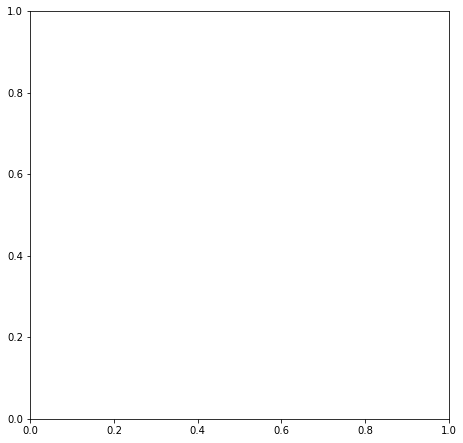

In [92]:
fig, axes = plt.subplots(1, 1, figsize = (7.5,7.5)) # Create grid of subplots using Seaborn
#Creating a smaller figure to fit in the presentation
ax = sns.boxplot(data = auto_test, x = "numclaims", y = "credit_score")
ax.set_xlabel('numclaims', fontsize = 20)
ax.set_ylabel("Credit Score", fontsize = 20)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

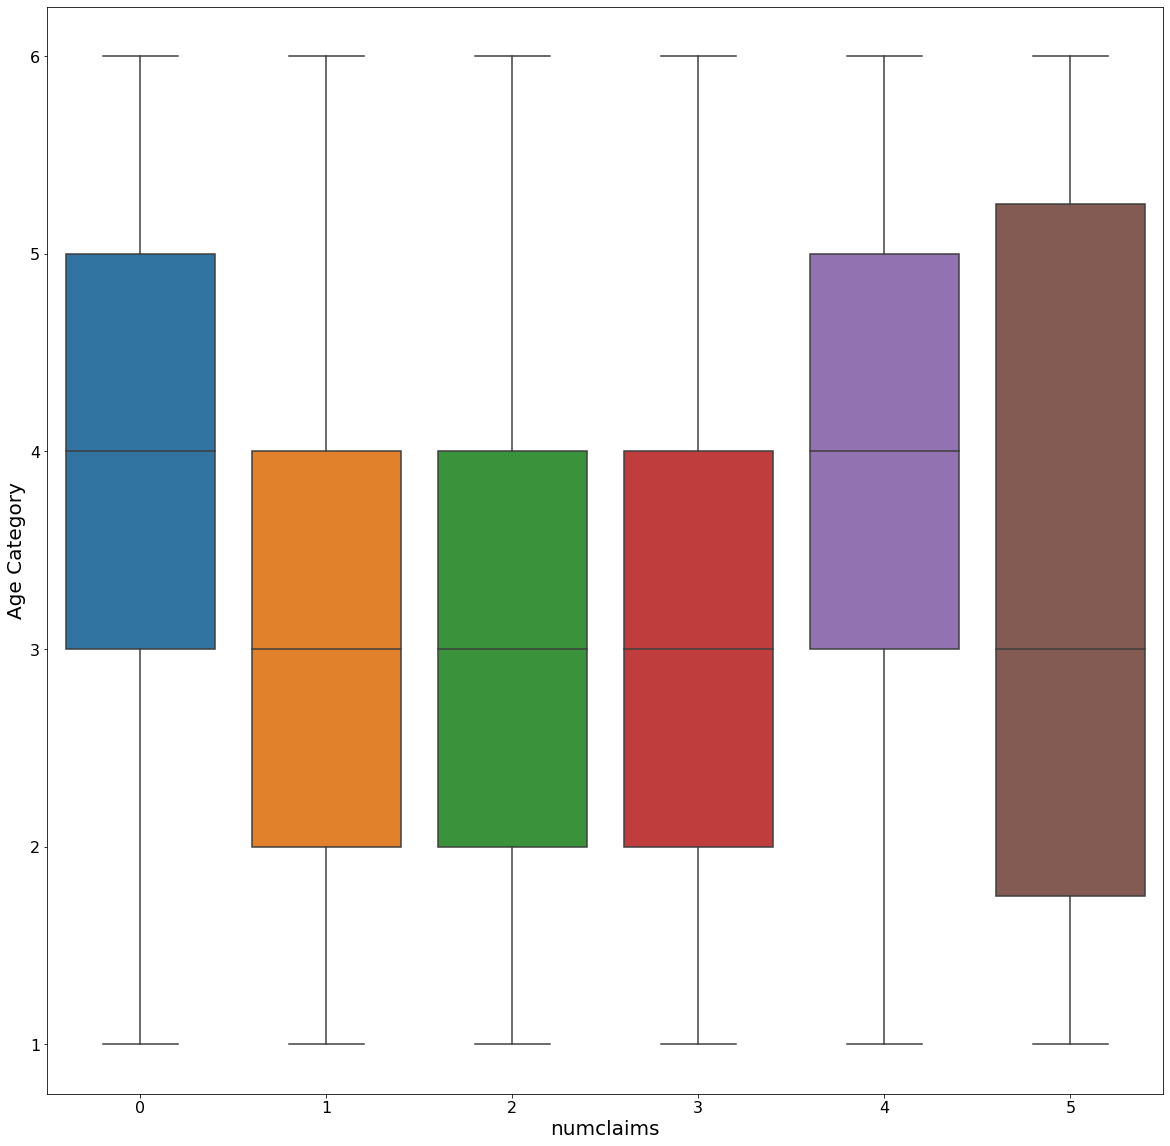

In [136]:
fig, axes = plt.subplots(1, 1, figsize = (20,20)) # Create grid of subplots using Seaborn

ax = sns.boxplot(data = auto_test, x = "numclaims", y = "agecat_new") # Define first plot
ax.set_xlabel('numclaims', fontsize = 20) # Parameters for first plot, making x label bigger
ax.set_ylabel("Age Category", fontsize = 20) # Parameters for first plot, making y label bigger
ax.tick_params(axis='x', labelsize=16)# Parameters for first plot, making x tick marks bigger
ax.tick_params(axis='y', labelsize=16)# Parameters for first plot, making y tick marks bigger



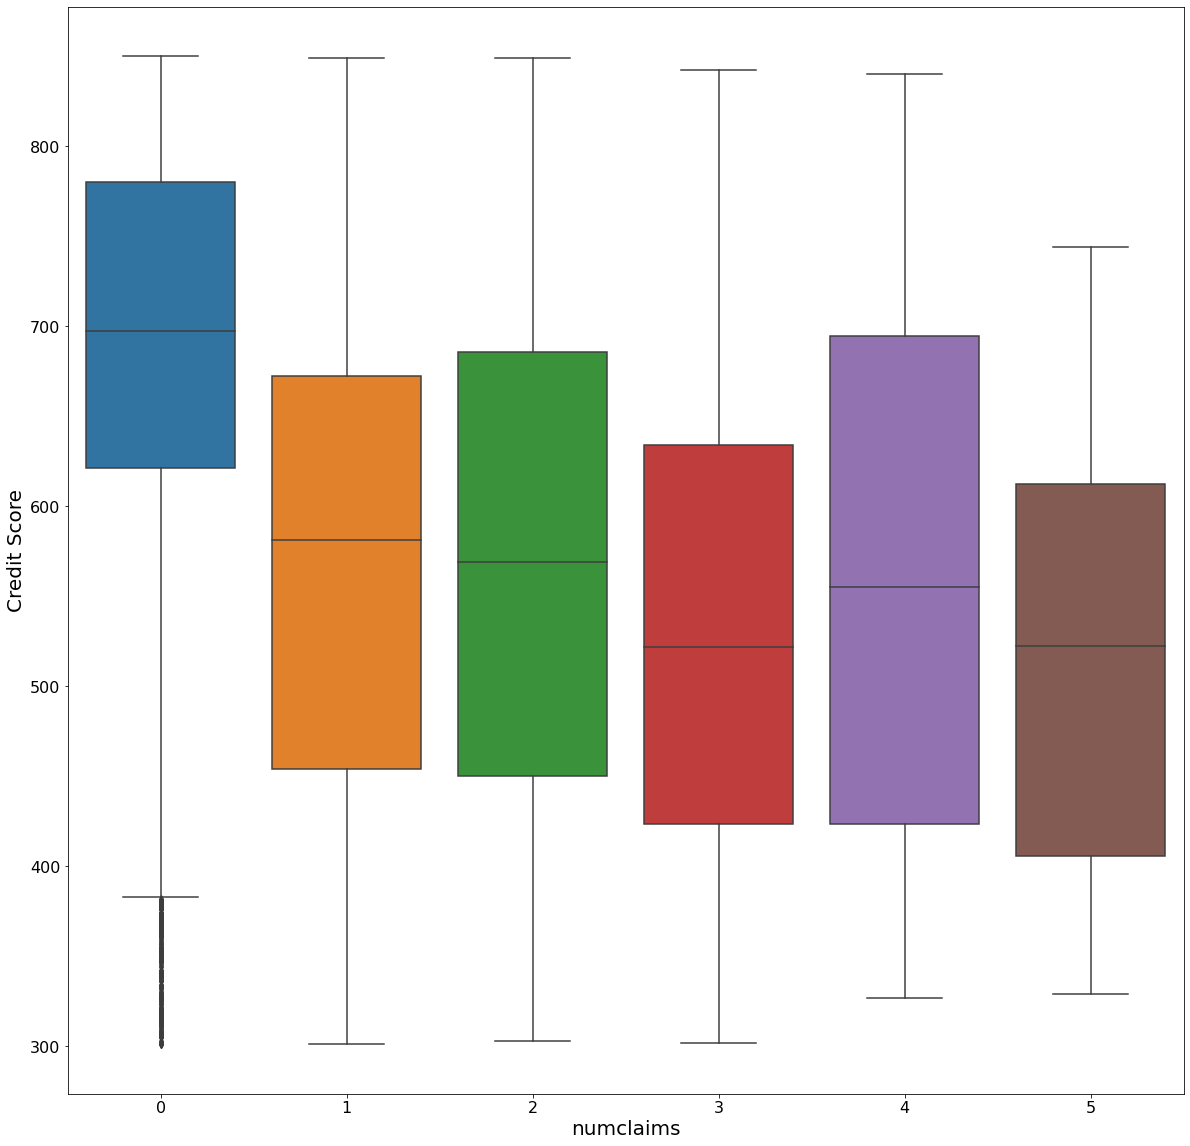

In [138]:
fig, axes = plt.subplots(1, 1, figsize = (20,20)) # Create grid of subplots using Seaborn

ax = sns.boxplot(data = auto_test, x = "numclaims", y = "credit_score")
ax.set_xlabel('numclaims', fontsize = 20)
ax.set_ylabel("Credit Score", fontsize = 20)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)



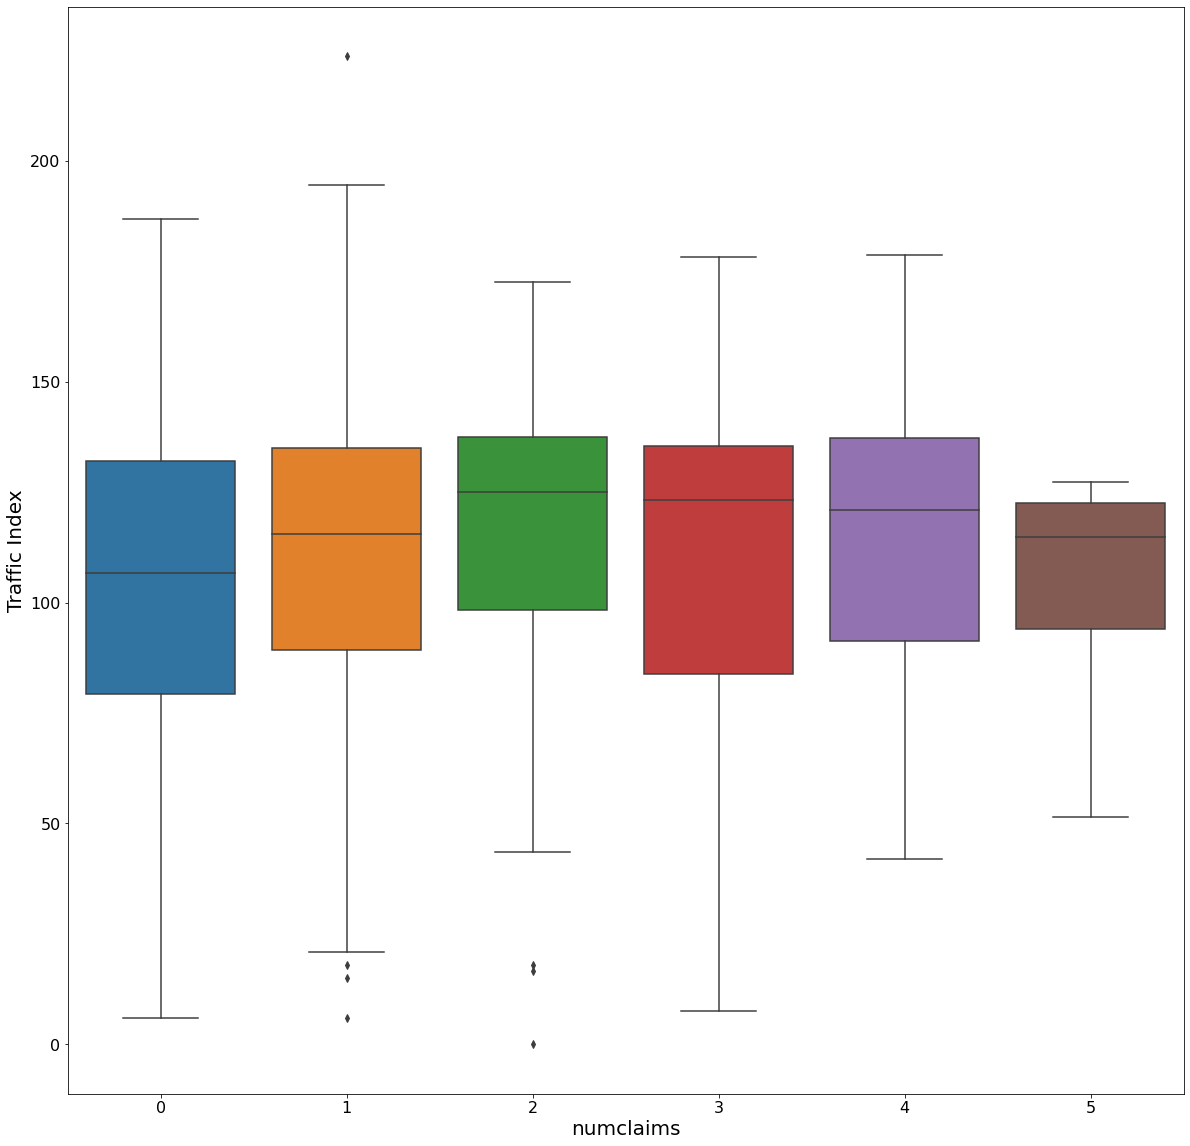

In [140]:
fig, axes = plt.subplots(1, 1, figsize = (20,20)) # Create grid of subplots using Seaborn

ax = sns.boxplot(data = auto_test, x = "numclaims", y = "traffic_index")
ax.set_xlabel('numclaims', fontsize = 20)
ax.set_ylabel("Traffic Index", fontsize = 20)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)


TypeError: 'AxesSubplot' object is not subscriptable

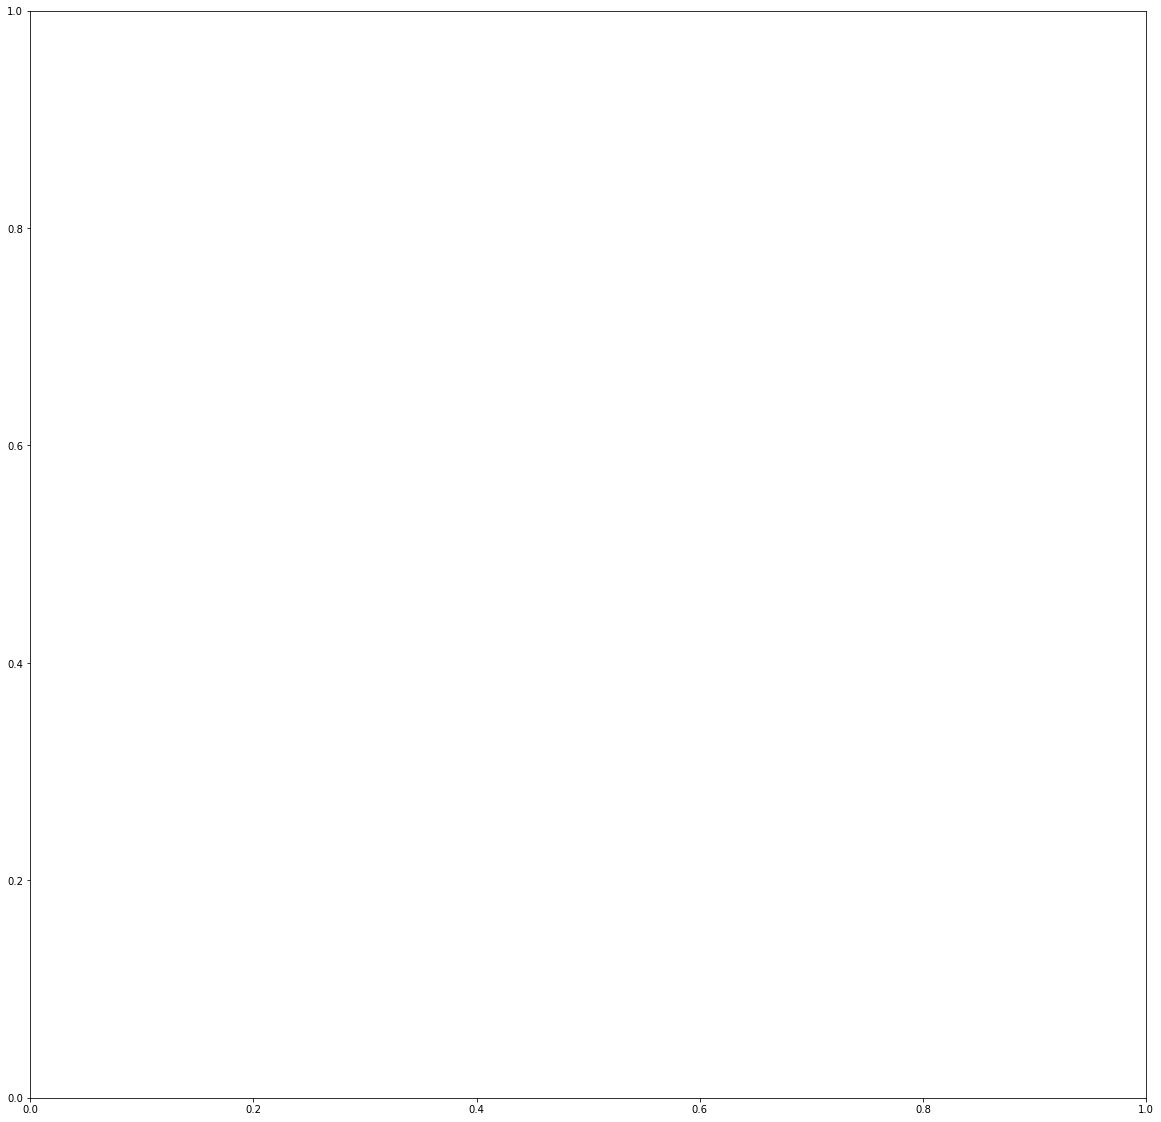

In [141]:
fig, axes = plt.subplots(1, 1, figsize = (20,20)) # Create grid of subplots using Seaborn

ax = sns.boxplot(data = auto_test, x = "numclaims", y = "veh_age" , ax=axes[1,1])
ax.set_xlabel('numclaims', fontsize = 20)
ax.set_ylabel("Vehicle Age", fontsize = 20)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

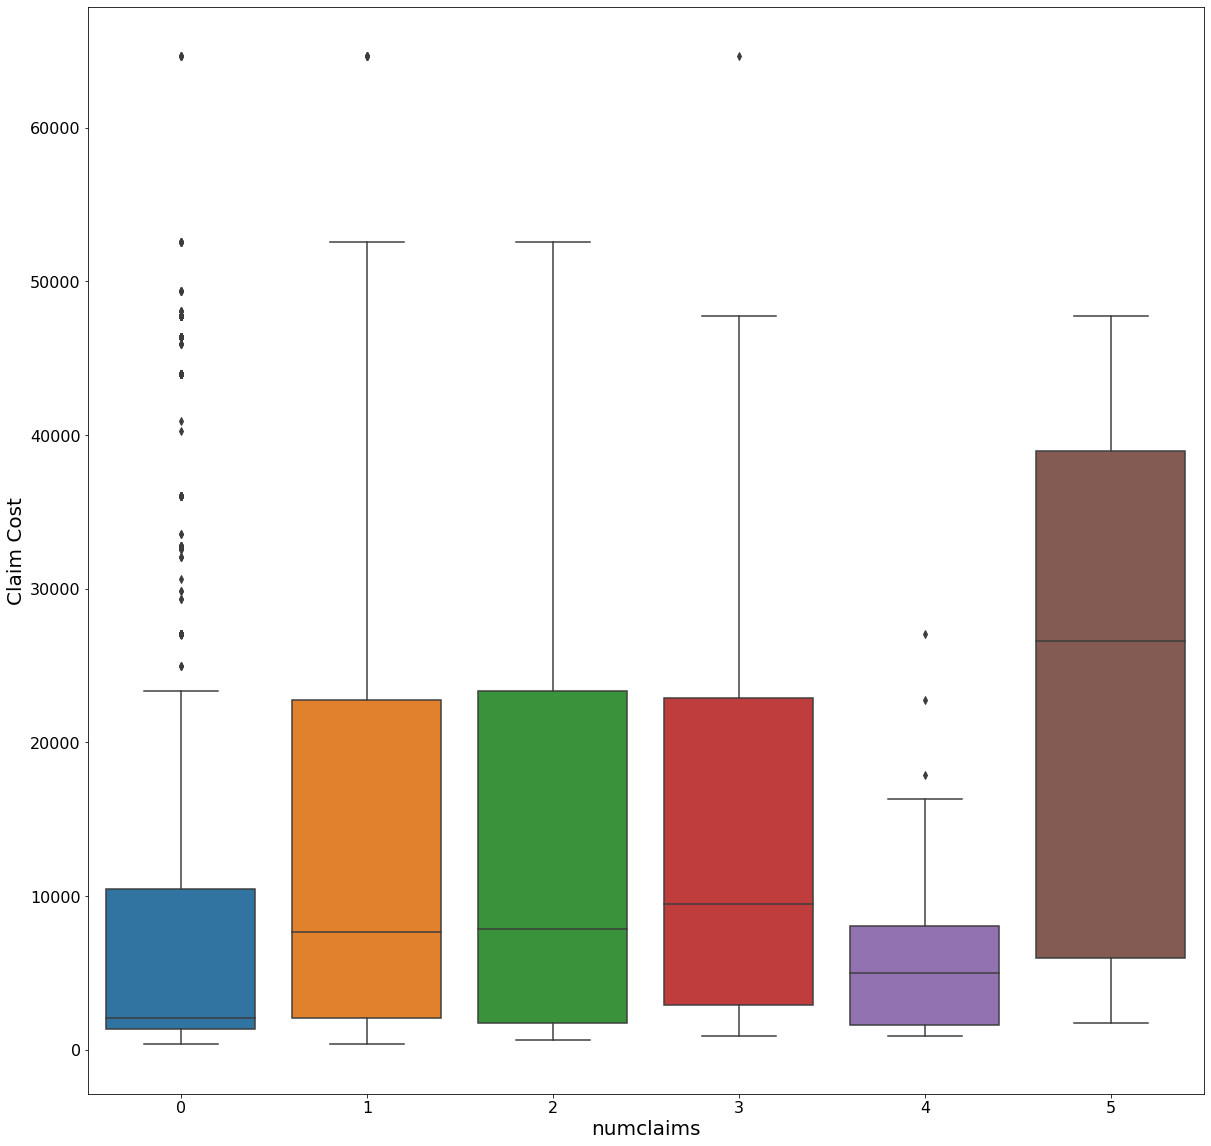

In [142]:
fig, axes = plt.subplots(1, 1, figsize = (20,20)) # Create grid of subplots using Seaborn


ax = sns.boxplot(data = auto_test, x = "numclaims", y = "claimcst0")
ax.set_xlabel('numclaims', fontsize = 20)
ax.set_ylabel("Claim Cost", fontsize = 20)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)



In [ ]:
fig, axes = plt.subplots(1, 1, figsize = (20,20)) # Create grid of subplots using Seaborn

ax = sns.boxplot(data = auto_test, x = "numclaims", y = "veh_value", ax=axes[0,0]) # Define first plot
ax.set_xlabel('numclaims', fontsize = 20) # Parameters for first plot, making x label bigger
ax.set_ylabel("Vehicle Value", fontsize = 20) # Parameters for first plot, making y label bigger
ax.tick_params(axis='x', labelsize=16)# Parameters for first plot, making x tick marks bigger
ax.tick_params(axis='y', labelsize=16)# Parameters for first plot, making y tick marks bigger